In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('FertilizersProduct.csv', encoding = 'latin-1')
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


## Get the data for India

In [3]:
df = df.loc[df.Area == 'India']
df.reset_index(inplace = True, drop = True) 
df.drop(columns = {'Area Code','Area','Year Code','Unit','Flag'}, inplace = True)
df.head()

,Item Code,Item,Element Code,Element,Year,Value
0,4007,"Ammonia, anhydrous",5610,Import Quantity,2002,1279348.13
1,4007,"Ammonia, anhydrous",5610,Import Quantity,2003,979985.94
2,4007,"Ammonia, anhydrous",5610,Import Quantity,2004,1189895.82
3,4007,"Ammonia, anhydrous",5610,Import Quantity,2005,1731417.05
4,4007,"Ammonia, anhydrous",5610,Import Quantity,2006,1781431.57


Text(0.5, 1.0, 'Import/Export of fertilizer in India over the years')

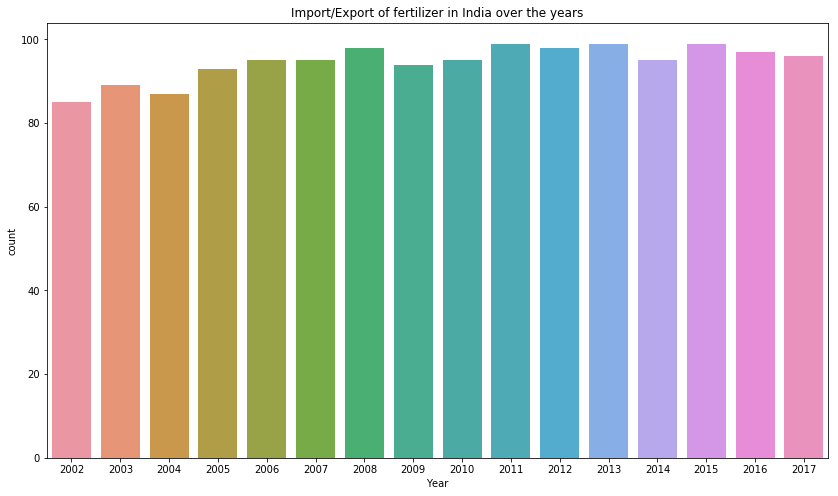

In [171]:
plt.figure(figsize=(14,8))
sns.countplot(x='Year',data=df);
plt.title('Import/Export of fertilizer in India over the years')

## Imports

### Import Quantity

In [175]:
imp_qty = df.loc[df['Element Code'] == 5610]
imp_qty.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
imp_qty = imp_qty.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
imp_qty

,Item,Value
0,Phosphate rock,96682378.35
1,Urea,76403811.19
2,Diammonium phosphate (DAP),58189247.39
3,Potassium chloride (muriate of potash) (MOP),53679824.56
4,"Ammonia, anhydrous",28782523.71
5,Other NP compounds,4539864.95
6,Monoammonium phosphate (MAP),4026177.54
7,Ammonium nitrate (AN),3019311.31
8,"Other potassic fertilizers, n.e.c.",2446204.78
9,NPK fertilizers,1727922.54


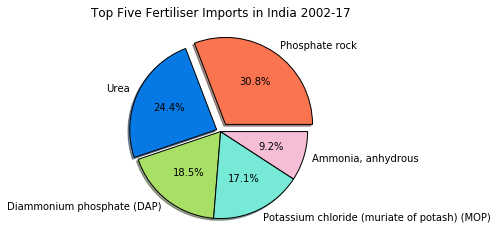

In [173]:
slices = imp_qty.head()['Value']
labels = labels= imp_qty.head()['Item']
explode = [0.1,0.05,0,0,0]
colors = ['#fa744f','#0779e4','#a8df65','#76ead7','#f6bed6']
plt.pie(slices, labels = labels,wedgeprops= {'edgecolor': 'black'},explode = explode, shadow= True, autopct = '%1.1f%%',
        colors = colors)
plt.title('Top Five Fertiliser Imports in India 2002-17')
plt.show()

<p>The <strong>top five</strong> imported fertilisers in India are-
<ol><li>Phosphate Rock</li>
    <li>Urea</li>
    <li>DAP</li>
    <li>MOP</li>
    <li>Ammonia, anhydrous</li>
</ol>
 </p>
<br>
Let's take a look at their trends-

Text(0.5, 1.0, 'Top Five Fertiliser Imports in India 2002-17(tonnes)')

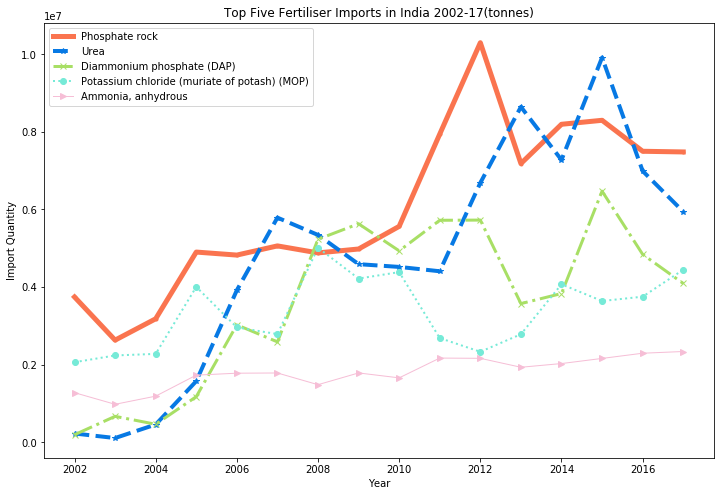

In [89]:
item = imp_qty.head()['Item'].unique()
k = 0
ls = ['-','--','-.',':','-']
mk = ['.','*','x','o','>']
plt.figure(figsize=(12,8))
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5610]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Import Quantity')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 5-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Top Five Fertiliser Imports in India 2002-17(tonnes)')

Observations -
1. The import of <b>Urea</b> was rising until 2015 after which it saw a sharp decline.
2. Similar can be said about <b>Phosphate rock</b>, which after 2012 is having a constant imports
3. <b>Ammonia, anhydrous</b> did not experience much change in its import quantity throughout the years.

### Import Value

In [174]:
imp_val = df.loc[df['Element Code'] == 5622]
imp_val.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
imp_val = imp_val.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
imp_val.head(5)

,Item,Value
0,Diammonium phosphate (DAP),30689646.47
1,Urea,22342967.19
2,Potassium chloride (muriate of potash) (MOP),17519316.35
3,Phosphate rock,11598407.50
4,"Ammonia, anhydrous",11155169.52


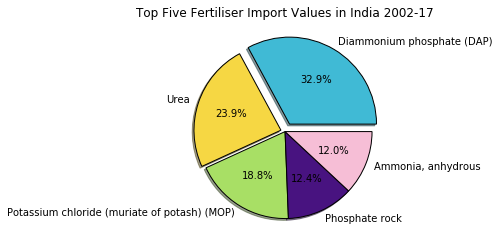

In [90]:
slices = imp_val.head()['Value']
labels = labels= imp_val.head()['Item']
explode = [0.1,0.05,0,0,0]
colors = ['#40bad5','#f6d743','#a8df65','#481380','#f6bed6']
plt.pie(slices, labels = labels,wedgeprops= {'edgecolor': 'black'},explode = explode, shadow= True, autopct = '%1.1f%%',
        colors = colors)
plt.title('Top Five Fertiliser Import Values in India 2002-17')
plt.show()

The Import Value of the fertilises is in correspondence with their Import Quantity, which sounds about right


Text(0.5, 1.0, 'Top Five Fertiliser Import Values in India 2002-17(in $1000 US)')

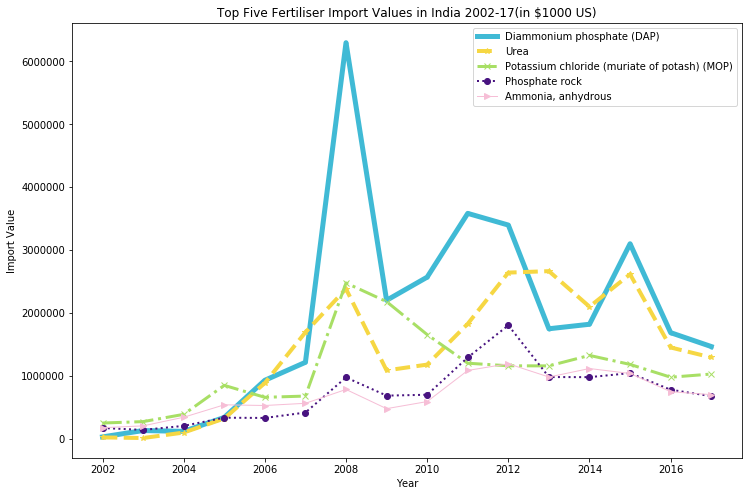

In [91]:
item = imp_val.head()['Item'].unique()
k = 0
ls = ['-','--','-.',':','-']
mk = ['.','*','x','o','>']
plt.figure(figsize=(12,8))
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5622]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Import Value')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 5-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Top Five Fertiliser Import Values in India 2002-17(in $1000 US)')

The most striking observation is that all five fertilisers had <b><i>increase</i></b> in thier import value in 2008, especially DAP, which might mean that their prices had increased. This might have happened because of the <b>Global Financial Crisis</b> in 2008. Part of the cause for these price rises was the rise in the price of oil, since the most fertilizers require petroleum or natural gas to manufacture.<br>
We can also see that after this period, thier import values seemed to normalise.

## Export

### Export Quantity

In [15]:
exp_qty = df.loc[df['Element Code'] == 5910]
exp_qty.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
exp_qty = exp_qty.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
exp_qty

,Item,Value
0,NPK fertilizers,626753.60
1,"Other nitrogenous fertilizers, n.e.c.",378694.82
2,Urea,185335.91
3,Potassium chloride (muriate of potash) (MOP),180019.69
4,Ammonium nitrate (AN),171624.63
5,Ammonium sulphate,147752.97
6,Diammonium phosphate (DAP),114389.53
7,Potassium sulphate (sulphate of potash) (SOP),113579.94
8,Monoammonium phosphate (MAP),96527.38
9,Superphosphates above 35%,68358.50


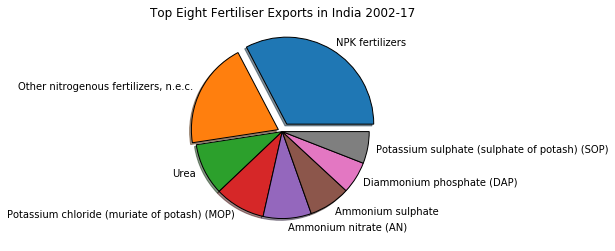

In [92]:
slices = exp_qty.head(8)['Value']
labels = labels= exp_qty.head(8)['Item']
explode = [0.1,0.05,0,0,0,0,0,0]
colors = ['#092532','#3ca59d','#a8df65','#bac964','#79d70f']
plt.pie(slices, labels = labels,wedgeprops= {'edgecolor': 'black'}, explode = explode, shadow  =True)
plt.title('Top Eight Fertiliser Exports in India 2002-17')
plt.show()

<b>NPK Fertilizers</b> and <b> other nitogenous fertilizers</b> were exported the most from India.

Text(0.5, 1.0, 'Top Five Fertiliser Exports in India 2002-17(tonnes)')

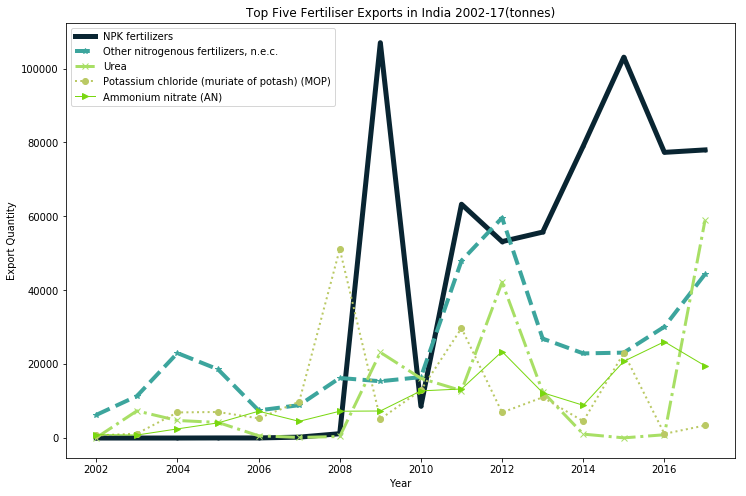

In [93]:
item = exp_qty.head()['Item'].unique()
k = 0
ls = ['-','--','-.',':','-']
mk = ['.','*','x','o','>']
plt.figure(figsize=(12,8))
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5910]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Export Quantity')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 5-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Top Five Fertiliser Exports in India 2002-17(tonnes)')

1. The amount of export of <b>NPK fertilizer</b> was almost neglgible until 2008, after which it experienced a huge increase in export amount in 2009. A large drop came in 2010 but since then, the export qty has been somewhat steadily rising.
2. Export qty of <b> other nitrogen fertilisers</b> have also been in a steady increase throughout the years.
3. MOP reached its peak in 2008, after which it has been in decline.
4. Urea was also in decline from 2012, but had a surge in 2017. 

### Export Value

In [84]:
exp_val = df.loc[df['Element Code'] == 5922]
exp_val.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
exp_val = exp_val.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
exp_val

,Item,Value
0,NPK fertilizers,235229.35
1,"Other nitrogenous fertilizers, n.e.c.",137518.46
2,Fertilizers n.e.c.,98424.43
3,Diammonium phosphate (DAP),73451.98
4,Ammonium nitrate (AN),70025.32
5,Urea,68301.13
6,Potassium chloride (muriate of potash) (MOP),66335.99
7,Potassium sulphate (sulphate of potash) (SOP),60707.25
8,Monoammonium phosphate (MAP),41985.16
9,Ammonium sulphate,27718.00


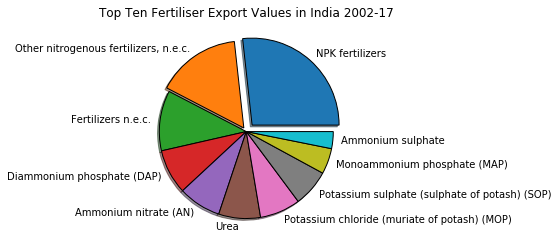

In [94]:
slices = exp_val.head(10)['Value']
labels = labels= exp_val.head(10)['Item']
explode = [0.1,0.05,0,0,0,0,0,0,0,0]
plt.pie(slices, labels = labels,wedgeprops= {'edgecolor': 'black'}, shadow= True, explode = explode)
plt.title('Top Ten Fertiliser Export Values in India 2002-17')
plt.show()

As expected, <b>NPK fertiliser</b> and <b>other nitrogenous fertiliser</b> had the highest values for exports

Text(0.5, 1.0, 'Top Five Fertiliser Export Values in India 2002-17(in $1000 US)')

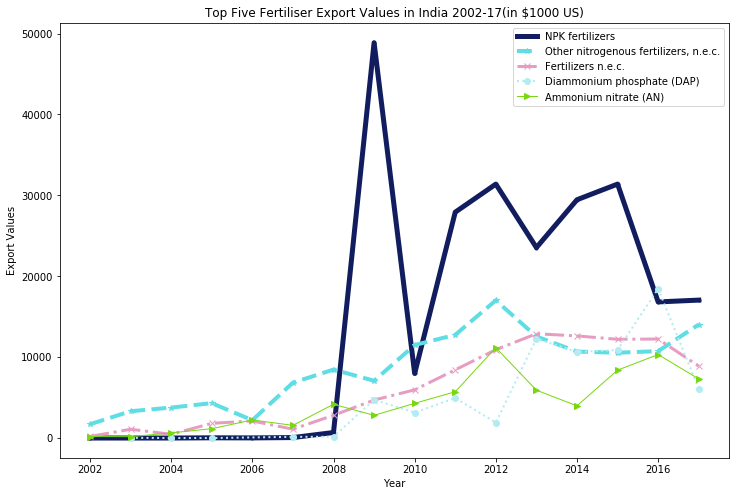

In [177]:
item = exp_val.head()['Item'].unique()
k = 0
ls = ['-','--','-.',':','-']
mk = ['.','*','x','o','>']
colors = ['#111d5e','#5fdde5','#e79cc2','#b2ebf2','#79d70f']
plt.figure(figsize=(12,8))
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5922]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Export Values')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 5-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Top Five Fertiliser Export Values in India 2002-17(in $1000 US)')

1. The graph for <b>NPK, other nitrogenous fertilisers and AN</b> is simlar to Export Quantity.
2. Despite <b>Urea</b> and <b>MOP</b> being third and fourth respectively in Export Quantity, they are not present in the top five Export Values. This might indicate India should focus on exporting other fertilers such as <b>DAP</b> which have more return

## Production

In [23]:
prod = df.loc[df['Element Code'] == 5510]
prod.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
prod = prod.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
prod

,Item,Value
0,Urea,319586826.0
1,Diammonium phosphate (DAP),66855700.0
2,"Superphosphates, other",44290000.0
3,NPK fertilizers,21496700.0
4,Other NP compounds,19468300.0
5,Ammonium sulphate,9563700.0
6,Phosphate rock,5237000.0
7,Calcium ammonium nitrate (CAN) and other mixtu...,1556800.0
8,Potassium chloride (muriate of potash) (MOP),0.0
9,Potassium sulphate (sulphate of potash) (SOP),0.0


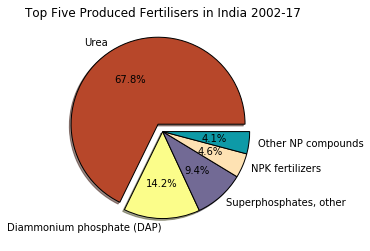

In [166]:
slices = prod.head()['Value']
labels = labels= prod.head()['Item']
explode = [0.1,0,0,0,0]
colors = ['#b7472a','#fbfd8a','#726a95','#fee2b3','#0e9aa7']
plt.pie(slices, labels = labels,wedgeprops= {'edgecolor': 'black'},explode = explode, shadow= True, autopct = '%1.1f%%',
        colors = colors)
plt.title('Top Five Produced Fertilisers in India 2002-17')
plt.show()

<b>Urea</b> clearly is the most produced fertiliser in the country.

Text(0.5, 1.0, 'Top Five Produced Fertilisers in India 2002-17(in tonnes)')

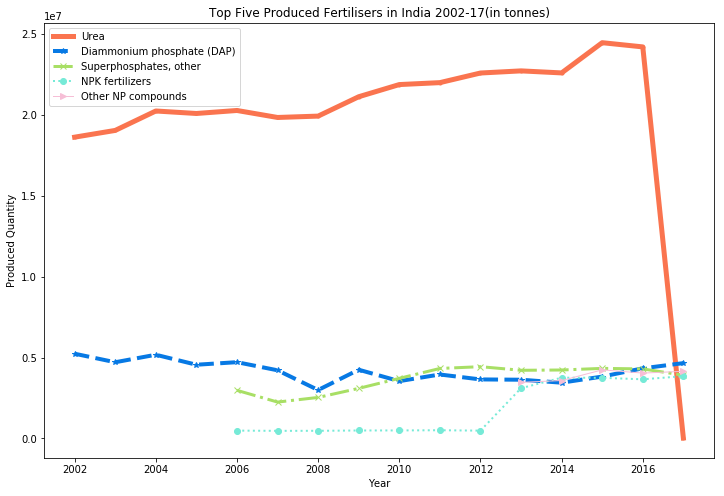

In [176]:
item = prod.head()['Item'].unique()
k = 0
ls = ['-','--','-.',':','-']
mk = ['.','*','x','o','>']
plt.figure(figsize=(12,8))
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5510]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Produced Quantity')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 5-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Top Five Produced Fertilisers in India 2002-17(in tonnes)')

1. <b>Urea</b> ahead of other fertilisers by a mile, but in 2017, its production dropped to <b><i>zero</i></b>.
2. There was very less production of <b>NPK</b> fertilisers in India until 2012. Since 2012, its production has increased and has remained constant.
3. The other three fertilisers followed a similar trend, thier only difference being the start of year of production.
<br><br>
Another inference that we can make out from this is that, NPK fertiliser(which was the most exported fetriliser in the country)  that India exported before 2012, might have been from the imports.

## Agricultural Use

In [26]:
agri = df.loc[df['Element Code'] == 5157]
agri.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
agri = agri.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
agri

,Item,Value
0,Urea,423780110.0
1,Diammonium phosphate (DAP),130281260.0
2,"Superphosphates, other",47690370.0
3,Other NP compounds,45120900.0
4,Potassium chloride (muriate of potash) (MOP),42108810.0
5,Ammonium sulphate,38209790.0
6,NPK fertilizers,25636950.0
7,Potassium sulphate (sulphate of potash) (SOP),4085860.0
8,Calcium ammonium nitrate (CAN) and other mixtu...,1562850.0
9,Monoammonium phosphate (MAP),1035980.0


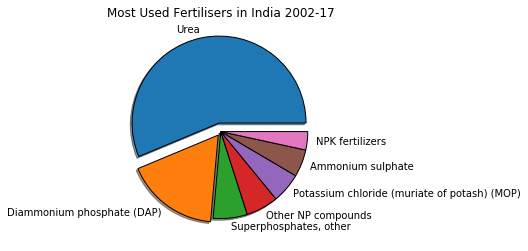

In [169]:
slices = agri.head(7)['Value']
labels = labels= agri.head(7)['Item']
explode = [0.1,0.05,0,0,0,0,0]
plt.pie(slices, labels = labels,wedgeprops= {'edgecolor': 'black'},shadow=True,explode = explode)
plt.title('Most Used Fertilisers in India 2002-17')
plt.show()

Again, <b>Urea</b> holds a major chunk of the total used fertilisers.

Text(0.5, 1.0, 'Most Used Fertilisers in India 2002-17(in tonnes)')

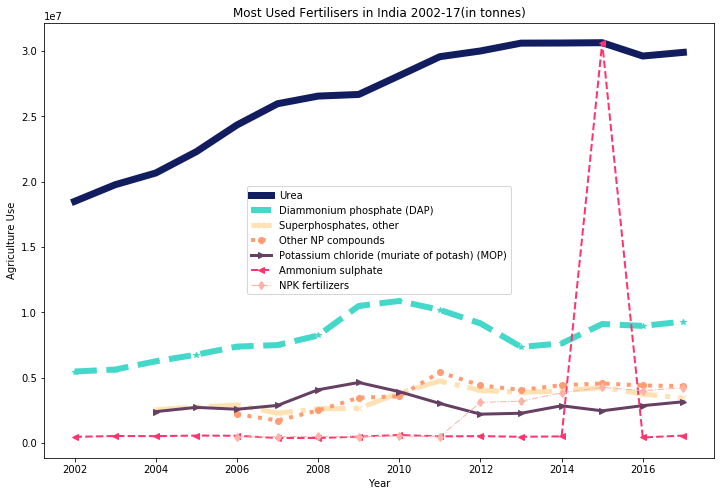

In [178]:
plt.figure(figsize=(12,8))
item = agri.head(7)['Item'].unique()
k = 0
ls = ['-','--','-.',':','-','--','-.']
mk = ['.','*','x','o','>','<','d']
colors = ['#111d5e','#43d8c9','#fee2b3','#ff9c71','#654062','#fe346e','#ffb2a7']
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5157]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Agriculture Use')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 7-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Most Used Fertilisers in India 2002-17(in tonnes)')

1. <b>Urea</b> is the most used fertiliser in India over the years, and its use was in constant increase over the years.
2. <b>Ammonium Sulphate</b> had an uncharacteristic increased use in 2015. All the other years, its use was very less.
3. <b>NPK Fertilizer's</b> use was also very low until 2012. This trend is in line with the production of fertilizers, wherein 2012 was the year where India started to produce NPK.


## Questions

After analysing the use of the fertilisers and their import/export trends across the years, this raises some questions-
1. What happened in 2017? <br>India imported <b>Urea</b> in a large scale till 2016, but after that <b><i>its production as well as import decreased significantly</i></b>. Did the government made some policy changes in 2017 which led to this? Or there were some other reasons?
2. Why was there a sudden huge spike in the Agricultural Use of <b>Ammonium Sulphate</b> in 2015?
3. As we have seen, before 2012, there was no production of <b>NPK</b>, but it was still the highest exported fertiliser. One can assume that India imported it and then used it for export in other countries. What did India do exactly to gain profit in this method?